In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets

from sklearn import metrics

In [7]:
# Chargement du jeu iris
iris = datasets.load_iris()

In [16]:
# Valeur des caractéristiques des iris
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [18]:
# Caractéristiques des iris
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [20]:
# Valeurs des types d'iris
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
# Noms des types d'iris
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [24]:
# Chargement du jeu iris en dataframe
df = pd.DataFrame(iris.data)
print(df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [36]:
# Définition des colonnes
df.columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal width"]

# Mise en Dataframe des types d'iris
y = pd.DataFrame(iris.target)

In [46]:
# Appliquer Kmeans
centers = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++') # Instantiation de l'algorithme avec i centres et méthodes d'initialisation k-means++
    km.fit(df) # Application aux données
    centers.append(km.inertia_) # On liste les centres

C:\Users\theob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\theob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\theob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\theob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [52]:
centers

[681.3706,
 152.34795176035792,
 78.8556658259773,
 57.228473214285714,
 50.17209264905149,
 41.97922563306258,
 35.61478965478966,
 30.063110617452722,
 28.781222943722945,
 26.25904246922668]

In [48]:
import matplotlib.pyplot as plt

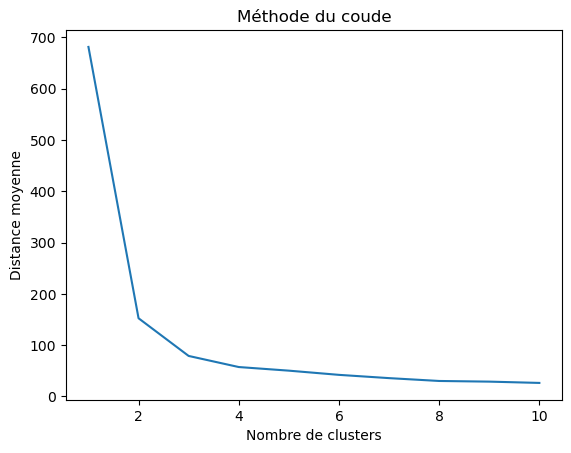

In [54]:
plt.plot(range(1,11), centers)
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Distance moyenne")
plt.show()

In [56]:
# On vérifie alors que k = 3 est le nombre de clusters idéal qu'il faudrait pour grouper au mieux les données
# On applique pour k = 3
km = KMeans(n_clusters = 3, init = 'k-means++')
km.fit(df)

C:\Users\theob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [58]:
print(km.labels_) # On a ici le cluster associé à chaque fleur

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [64]:
km_df = km.labels_

In [66]:
df['Cluster'] = km_df
df # Meilleur affichage des données

,Sepal Length,Sepal Width,Petal Length,Petal width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [70]:
cluster_df = df.groupby(['Cluster']).median().round(0)
cluster_df # Médiane de chaque caractéristique pour chaque cluster

,Sepal Length,Sepal Width,Petal Length,Petal width
Cluster,,,,
0,6.0,3.0,4.0,1.0
1,5.0,3.0,2.0,0.0
2,7.0,3.0,6.0,2.0


In [74]:
# Affichage grâce à l'ACP

n_cp = 2

# Projection des données en 3d sur un plan (2d)
pca = PCA(n_components = n_cp)
pca.fit(df)

proj = pca.transform(df)

array([[-2.65752889e+00,  4.96644685e-01],
       [-2.68972376e+00,  2.96583949e-01],
       [-2.86358942e+00,  3.33171328e-01],
       [-2.72129940e+00,  2.52236303e-01],
       [-2.70184177e+00,  5.07799511e-01],
       [-2.25389978e+00,  6.37449702e-01],
       [-2.79502312e+00,  3.59181768e-01],
       [-2.60047876e+00,  4.29987388e-01],
       [-2.86291883e+00,  1.61754889e-01],
       [-2.64824626e+00,  3.16707277e-01],
       [-2.47965813e+00,  6.07738472e-01],
       [-2.58774152e+00,  3.74484916e-01],
       [-2.76167592e+00,  2.78605433e-01],
       [-3.19865223e+00,  2.18376752e-01],
       [-2.61455718e+00,  8.28322737e-01],
       [-2.35593337e+00,  8.86678264e-01],
       [-2.59485935e+00,  6.94560610e-01],
       [-2.62182805e+00,  4.94010829e-01],
       [-2.17278508e+00,  6.70153477e-01],
       [-2.56077283e+00,  5.75034696e-01],
       [-2.28499367e+00,  4.83881424e-01],
       [-2.51701043e+00,  5.40633642e-01],
       [-3.18780665e+00,  4.82460929e-01],
       [-2.

<Axes: >

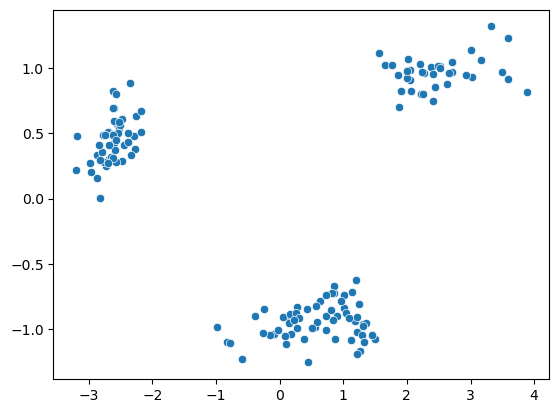

In [84]:
# Affichage des données sur le plan grâce à l'ACP
proj_ = pd.DataFrame(proj)
sns.scatterplot(data = proj_, x = proj[:,0], y = proj[:,1], alpha = 1) # On remarque bien les 3 clusters bien identifiés

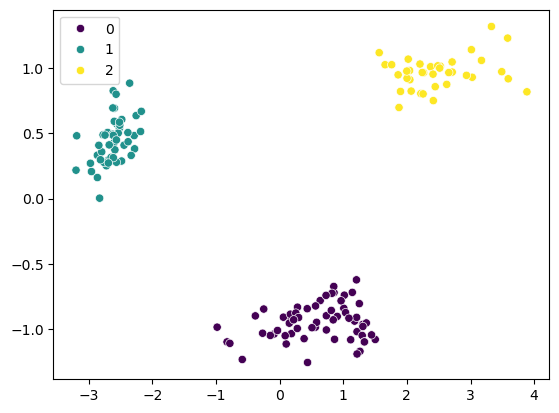

In [94]:
sns.scatterplot(data = proj_, x = proj[:,0], y = proj[:,1], palette = 'viridis', alpha = 1, hue = km_df)
plt.legend()
plt.show()

In [118]:
# On peut interpréter les données en comparant ce graphique avec les données brutes
# On peut aussi aller plus loin avec les cercles de corrélation

def display_circles(pcs, n_comp, pca, axis_rank, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_rank:
        if d2 < n_comp:

            #Initialisation de la figure
            fig, ax = plt.subplots(figsize=(10, 10))
            
            # Détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Affichage des flèches
            # Si plus de 30 flèches, on n'affiche par le triangle à leur extrémités
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")            
            else:
                lines = [[[0,0], [x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
                
            # Affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # Affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # Affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Noms des axes, avec pourcentage d'inertie
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+2))
            plt.show(block=False)

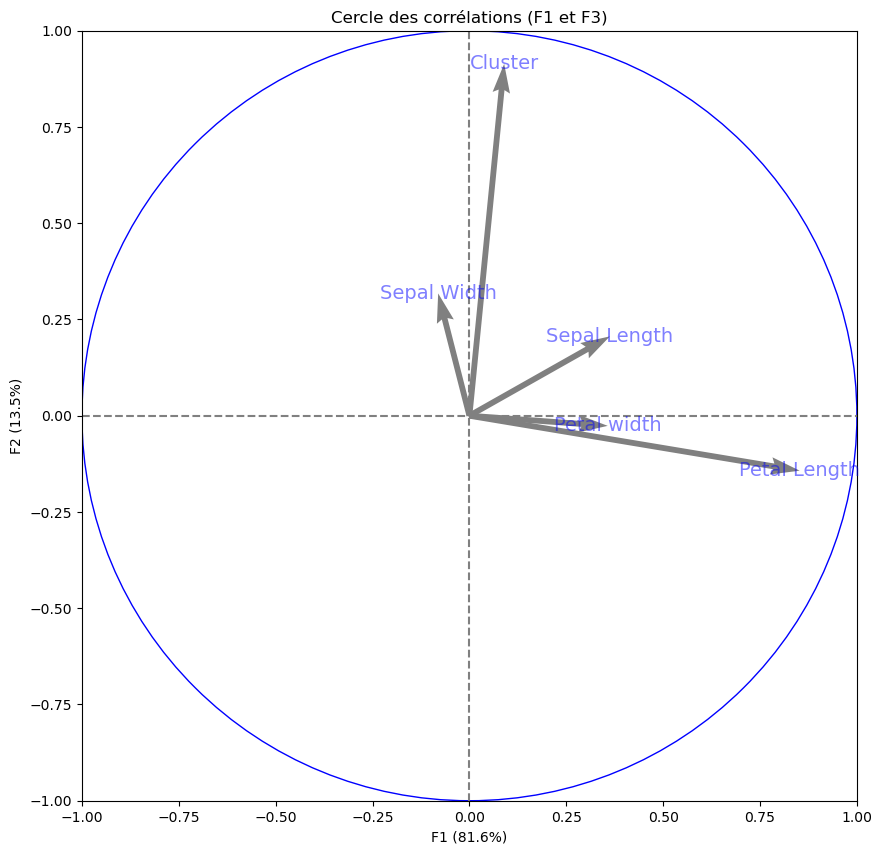

In [120]:
index = df.index
features = df.columns
choix_n_c = 2
pcs = pca.components_
display_circles(pcs, choix_n_c, pca, [(0,1)], labels=np.array(features))